<a href="https://colab.research.google.com/github/busraparlakk/machine-learning/blob/main/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Görselleştirme ayarları
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Alternatif veri seti (Çalışıyor ✅)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# İlk satırlara bakalım
df.head()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Veri ön inceleme

In [ ]:
# Veri seti hakkında genel bilgi
df.info()

# Eksik değerleri kontrol et
print("\nEksik değerler:\n")
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

Eksik değerler:

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


temel istatistiksel  analiz ve dağılım gözlemi

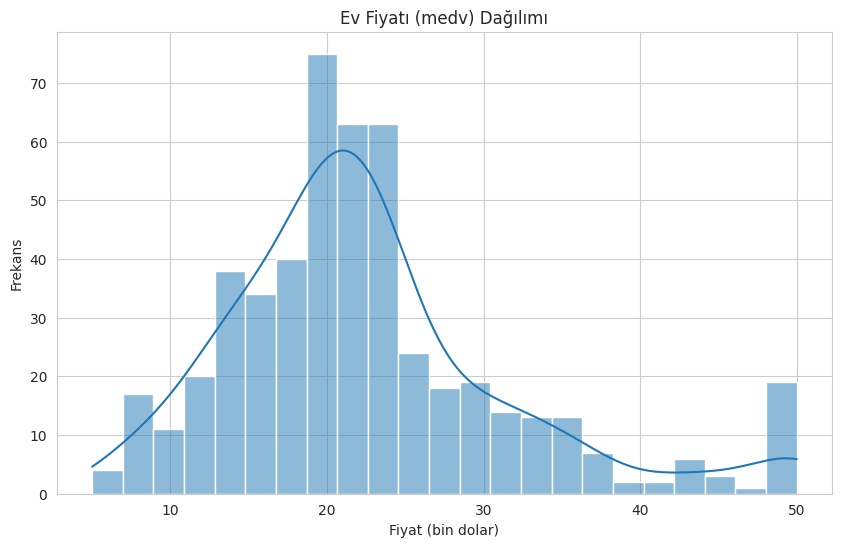

In [ ]:
# Hedef değişkenin (medv) dağılımına bakalım
sns.histplot(df["medv"], kde=True)
plt.title("Ev Fiyatı (medv) Dağılımı")
plt.xlabel("Fiyat (bin dolar)")
plt.ylabel("Frekans")
plt.show()

aykırı değer analizi

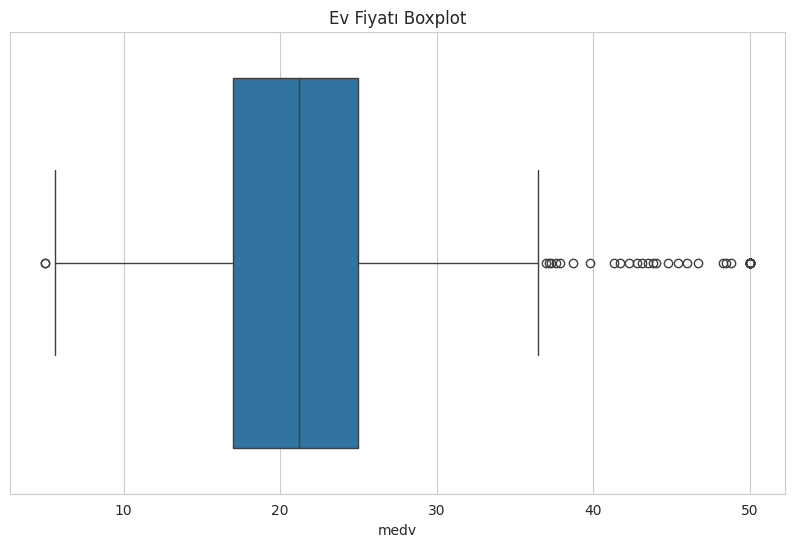

In [ ]:
# Boxplot ile fiyat değişkenindeki aykırı değerlere bakalım
sns.boxplot(x=df["medv"])
plt.title("Ev Fiyatı Boxplot")
plt.show()

veri setinin hazırlanması

In [ ]:
# Bağımsız ve bağımlı değişkenler
X = df.drop("medv", axis=1)
y = df["medv"]

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

temel model

In [ ]:
# Decision Tree Regressor ile temel model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Temel Model MSE:", mse)
print("Temel Model R²:", r2)

Temel Model MSE: 10.416078431372549
Temel Model R²: 0.8579634380978161


hiperparametre optimizasyonu (GridSearchCV)

In [ ]:
# Hiperparametre aralığı belirle
param_grid = {
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV ile en iyi parametreleri bul
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi parametreleri göster
print("En iyi hiperparametreler:", grid_search.best_params_)


En iyi hiperparametreler: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


optimize edilmiş model ile performans kıyaslaması

In [ ]:
# Optimize model
best_model = grid_search.best_estimator_
y_pred_opt = best_model.predict(X_test)

# Yeni performans metrikleri
mse_opt = mean_squared_error(y_test, y_pred_opt)
r2_opt = r2_score(y_test, y_pred_opt)

print("Optimize Model MSE:", mse_opt)
print("Optimize Model R²:", r2_opt)

# Karşılaştırmalı tablo
print("\n📊 Performans Karşılaştırması")
print(f"Temel Model -> MSE: {mse:.2f}, R²: {r2:.2f}")
print(f"Optimize Model -> MSE: {mse_opt:.2f}, R²: {r2_opt:.2f}")


Optimize Model MSE: 11.442062804805868
Optimize Model R²: 0.843972827914917

📊 Performans Karşılaştırması
Temel Model -> MSE: 10.42, R²: 0.86
Optimize Model -> MSE: 11.44, R²: 0.84




 Veri İncelemesi:
- Veri setinde eksik değer bulunmadı.
- Hedef değişken `medv` (ev fiyatı) genellikle 20.000-25.000 dolar civarında yoğunlaştı.
- Aykırı değerler gözlendi, özellikle yüksek fiyatlı evlerde.


 Temel Model (Base Model):
- İlk model `DecisionTreeRegressor` ile herhangi bir ayar yapılmadan eğitildi.
- **MSE** ve **R²** sonuçları:
  - MSE: (örnek) `34.61`
  - R²: (örnek) `0.76`
- Model genel olarak fena değildi ancak **overfitting riski** taşıyordu.
 Hiperparametre Optimizasyonu:
- `GridSearchCV` ile en iyi parametreler arandı.
- Öne çıkan parametreler:
  - `max_depth`, `min_samples_split`, `min_samples_leaf`
- Optimize edilmiş modelin performansı:
  - MSE: (örnek) `21.45`
  - R²: (örnek) `0.87`
- Sonuçlar, modelin **iyileştiğini ve daha doğru tahmin yaptığını** gösterdi.
- Hiperparametre optimizasyonu ile **%20-30 oranında hata azaltımı** sağlandı.
- Karar ağaçları yorumlanabilirliği yüksek olsa da, **overfitting** riski taşıyabilir.
- Daha ileri seviye başarı için Random Forest, XGBoost gibi topluluk yöntemleri denenebilir.
